In [205]:
#Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are
#fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have 
#strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts 
#in the trend, and typically handles outliers well.
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [206]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
print('x' in np.arange(5))   #returns False, without Warning

False


1. Read the data in from the states all extended CSV file then set the index to the 'YEAR' column. We are also parsing dates in the data file.

In [207]:
edu_df = pd.read_csv('../US_Education/states_all_extended.csv')

In [208]:
edu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Create a dataframe with the needed variables(Year and total expenditures)

In [209]:
def TotalsByYear(column):
    year_1992 = edu_df[edu_df['YEAR'] == 1992]
    year_1993 = edu_df[edu_df['YEAR'] == 1993]
    year_1994 = edu_df[edu_df['YEAR'] == 1994]
    year_1995 = edu_df[edu_df['YEAR'] == 1995]
    year_1996 = edu_df[edu_df['YEAR'] == 1996]
    year_1997 = edu_df[edu_df['YEAR'] == 1997]
    year_1998 = edu_df[edu_df['YEAR'] == 1998]
    year_1999 = edu_df[edu_df['YEAR'] == 1999]
    year_2000 = edu_df[edu_df['YEAR'] == 2000]
    year_2001 = edu_df[edu_df['YEAR'] == 2001]
    year_2002 = edu_df[edu_df['YEAR'] == 2002]
    year_2003 = edu_df[edu_df['YEAR'] == 2003]
    year_2004 = edu_df[edu_df['YEAR'] == 2004]
    year_2005 = edu_df[edu_df['YEAR'] == 2005]
    year_2006 = edu_df[edu_df['YEAR'] == 2006]
    year_2007 = edu_df[edu_df['YEAR'] == 2007]
    year_2008 = edu_df[edu_df['YEAR'] == 2008]
    year_2009 = edu_df[edu_df['YEAR'] == 2009]
    year_2010 = edu_df[edu_df['YEAR'] == 2010]
    year_2011 = edu_df[edu_df['YEAR'] == 2011]
    year_2012 = edu_df[edu_df['YEAR'] == 2012]
    year_2013 = edu_df[edu_df['YEAR'] == 2013]
    year_2014 = edu_df[edu_df['YEAR'] == 2014]
    year_2015 = edu_df[edu_df['YEAR'] == 2015]
    year_2016 = edu_df[edu_df['YEAR'] == 2016]
    
    SUM_year_1992 = year_1992[column].sum()
    SUM_year_1993 = year_1993[column].sum()
    SUM_year_1994 = year_1994[column].sum()
    SUM_year_1995 = year_1995[column].sum()
    SUM_year_1996 = year_1996[column].sum()
    SUM_year_1997 = year_1997[column].sum()
    SUM_year_1998 = year_1998[column].sum()
    SUM_year_1999 = year_1999[column].sum()
    SUM_year_2000 = year_2000[column].sum()
    SUM_year_2001 = year_2001[column].sum()
    SUM_year_2002 = year_2002[column].sum()
    SUM_year_2003 = year_2003[column].sum()
    SUM_year_2004 = year_2004[column].sum()
    SUM_year_2005 = year_2005[column].sum()
    SUM_year_2006 = year_2006[column].sum()
    SUM_year_2007 = year_2007[column].sum()
    SUM_year_2008 = year_2008[column].sum()
    SUM_year_2009 = year_2009[column].sum()
    SUM_year_2010 = year_2010[column].sum()
    SUM_year_2011 = year_2011[column].sum()
    SUM_year_2012 = year_2012[column].sum()
    SUM_year_2013 = year_2013[column].sum()
    SUM_year_2014 = year_2014[column].sum()
    SUM_year_2015 = year_2015[column].sum()
    SUM_year_2016 = year_2016[column].sum()
    
    SUM_df = pd.DataFrame({'Year': ['1992','1993','1994','1995','1996', '1997','1998','1999','2000','2001','2002','2003',
                                    '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016',],
                          'Total_Expenditure':[SUM_year_1992,SUM_year_1993,SUM_year_1994,SUM_year_1995,SUM_year_1996,SUM_year_1997,
                                               SUM_year_1998,SUM_year_1999,SUM_year_2000,SUM_year_2001,SUM_year_2002,SUM_year_2003,
                                               SUM_year_2004,SUM_year_2005,SUM_year_2006,SUM_year_2007,SUM_year_2008,SUM_year_2009,
                                               SUM_year_2010,SUM_year_2011,SUM_year_2012,SUM_year_2013,SUM_year_2014,SUM_year_2015,
                                               SUM_year_2016]
                          })
    return SUM_df;

In [210]:
TotalsByYear(column="TOTAL_EXPENDITURE")
#edu_df[edu_df['YEAR'] == 1992]

,Year,Total_Expenditure
0,1992,237333143.0
1,1993,244202408.0
2,1994,252664869.0
3,1995,281831835.0
4,1996,297740499.0
5,1997,315861220.0
6,1998,336384794.0
7,1999,360474429.0
8,2000,386177409.0
9,2001,417014891.0


In [211]:
df_copy = TotalsByYear(column="TOTAL_EXPENDITURE")

In [212]:
df_copy.head()

,Year,Total_Expenditure
0,1992,237333143.0
1,1993,244202408.0
2,1994,252664869.0
3,1995,281831835.0
4,1996,297740499.0


In [213]:
df_copy=df_copy.rename(columns={'Year':'ds', 'Total_Expenditure':'y'})

In [214]:
df_copy.set_index('ds', inplace=True)
df_copy.head()

,y
ds,
1992,237333143.0
1993,244202408.0
1994,252664869.0
1995,281831835.0
1996,297740499.0


In [215]:
df = TotalsByYear(column="TOTAL_EXPENDITURE")

In [216]:
df.head()

,Year,Total_Expenditure
0,1992,237333143.0
1,1993,244202408.0
2,1994,252664869.0
3,1995,281831835.0
4,1996,297740499.0


3. For prophet to work, we need to change the names of these columns to 'ds' and 'y'.

In [217]:
df=df.rename(columns={'Year':'ds', 'Total_Expenditure':'y'})

In [218]:
df.head()

,ds,y
0,1992,237333143.0
1,1993,244202408.0
2,1994,252664869.0
3,1995,281831835.0
4,1996,297740499.0


4. Plot data

<AxesSubplot:xlabel='ds'>

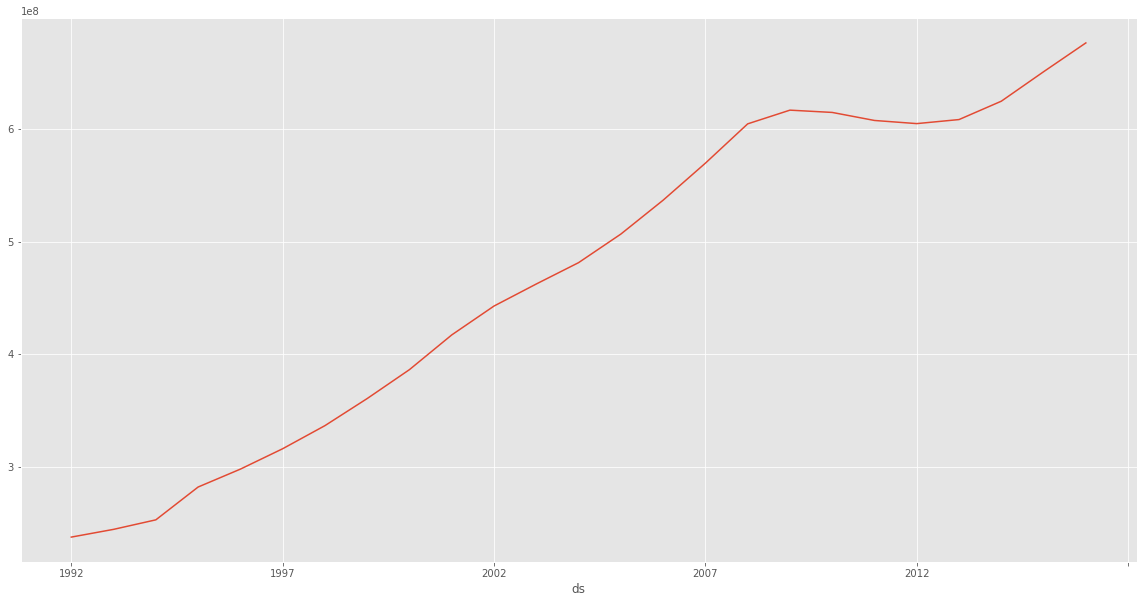

In [219]:
df.set_index('ds').y.plot()

5. To log-transform your data, you can use numpy's log() function

In [220]:
df['y'] = np.log(df['y'])

In [221]:
df.tail()

,ds,y
20,2012,20.220417
21,2013,20.226349
22,2014,20.252811
23,2015,20.293868
24,2016,20.332482


<AxesSubplot:xlabel='ds'>

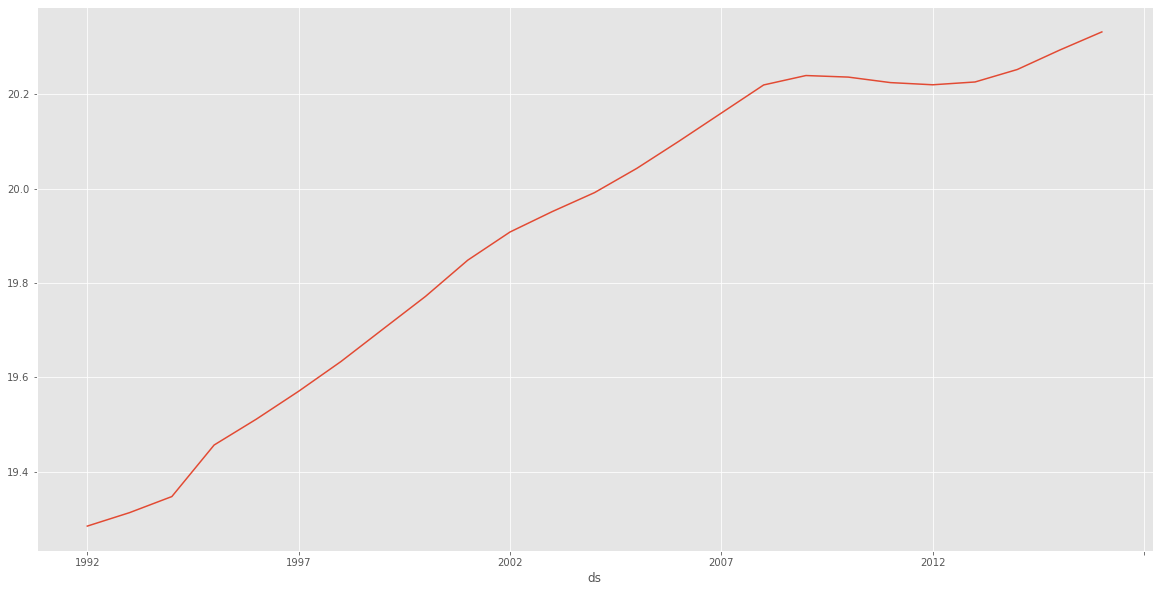

In [222]:
df.set_index('ds').y.plot()

6.the plot looks the same as the first one but just at a different scale

7. set prophet up to begin modeling our data.

In [223]:
model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


8.  add some future dates to our dataframe. For this example, I want to forecast 4 years into the future

In [224]:
future = model.make_future_dataframe(periods=4, freq = 'y')
future.tail()

,ds
24,2016-01-01
25,2016-12-31
26,2017-12-31
27,2018-12-31
28,2019-12-31


9. To forecast this future data, we need to run it through Prophet's model.

In [225]:
forecast = model.predict(future)

In [226]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
24,2016-01-01,1.908308,20.312999,20.326570,1.908308,1.908308,18.411253,18.411253,18.411253,18.411253,18.411253,18.411253,0.0,0.0,0.0,20.319562
25,2016-12-31,1.930078,20.306491,20.333136,1.917393,1.939526,18.391237,18.391237,18.391237,18.391237,18.391237,18.391237,0.0,0.0,0.0,20.321315
26,2017-12-31,1.951847,20.239164,20.331535,1.901607,1.989654,18.339067,18.339067,18.339067,18.339067,18.339067,18.339067,0.0,0.0,0.0,20.290913
27,2018-12-31,1.973616,20.116975,20.310647,1.871644,2.063513,18.243864,18.243864,18.243864,18.243864,18.243864,18.243864,0.0,0.0,0.0,20.217480
28,2019-12-31,1.995385,19.928552,20.243302,1.831766,2.149018,18.094836,18.094836,18.094836,18.094836,18.094836,18.094836,0.0,0.0,0.0,20.090221


10. We really only want to look at yhat, yhat_lower and yhat_upper, so we can do that with:

In [227]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
24,2016-01-01,20.319562,20.312999,20.326570
25,2016-12-31,20.321315,20.306491,20.333136
26,2017-12-31,20.290913,20.239164,20.331535
27,2018-12-31,20.217480,20.116975,20.310647
28,2019-12-31,20.090221,19.928552,20.243302


11. Plotting prophet Results

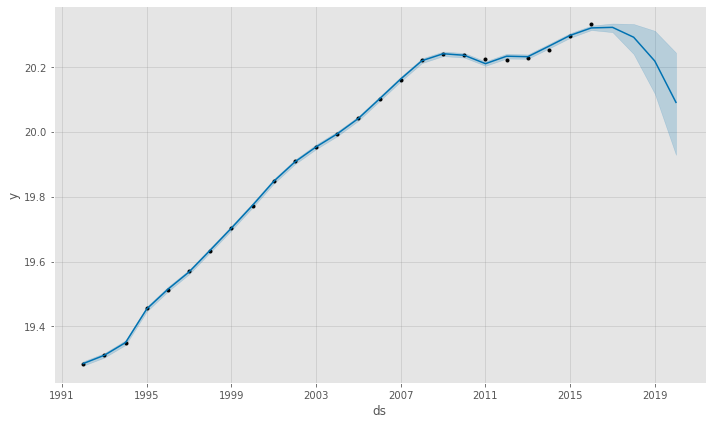

In [228]:
model.plot(forecast);

Visualizing Prophet models

In [229]:
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

combine the original data and our forecast model data

In [230]:
viz_df = df_copy.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [231]:
viz_df.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
1992-01-01,237333143.0,19.285689,19.279114,19.292466
1993-01-01,244202408.0,19.311364,19.304164,19.317991
1994-01-01,252664869.0,19.350436,19.343045,19.357639
1995-01-01,281831835.0,19.453960,19.446133,19.460894
1996-01-01,297740499.0,19.514591,19.507599,19.522026


In [232]:
viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])
viz_df.head()

,y,yhat,yhat_lower,yhat_upper,yhat_rescaled
ds,,,,,
1992-01-01,237333143.0,19.285689,19.279114,19.292466,2.375025e+08
1993-01-01,244202408.0,19.311364,19.304164,19.317991,2.436793e+08
1994-01-01,252664869.0,19.350436,19.343045,19.357639,2.533889e+08
1995-01-01,281831835.0,19.453960,19.446133,19.460894,2.810265e+08
1996-01-01,297740499.0,19.514591,19.507599,19.522026,2.985926e+08


In [233]:
viz_df.set_index('y', inplace=False)

,yhat,yhat_lower,yhat_upper,yhat_rescaled
y,,,,
237333143.0,19.285689,19.279114,19.292466,2.375025e+08
244202408.0,19.311364,19.304164,19.317991,2.436793e+08
252664869.0,19.350436,19.343045,19.357639,2.533889e+08
281831835.0,19.453960,19.446133,19.460894,2.810265e+08
297740499.0,19.514591,19.507599,19.522026,2.985926e+08
315861220.0,19.568010,19.560990,19.574489,3.149770e+08
336384794.0,19.635088,19.628426,19.642030,3.368298e+08
360474429.0,19.702986,19.695957,19.709894,3.604940e+08
386177409.0,19.773234,19.766117,19.780247,3.867288e+08


In [234]:
viz_df.head()

,y,yhat,yhat_lower,yhat_upper,yhat_rescaled
ds,,,,,
1992-01-01,237333143.0,19.285689,19.279114,19.292466,2.375025e+08
1993-01-01,244202408.0,19.311364,19.304164,19.317991,2.436793e+08
1994-01-01,252664869.0,19.350436,19.343045,19.357639,2.533889e+08
1995-01-01,281831835.0,19.453960,19.446133,19.460894,2.810265e+08
1996-01-01,297740499.0,19.514591,19.507599,19.522026,2.985926e+08


<AxesSubplot:xlabel='ds'>

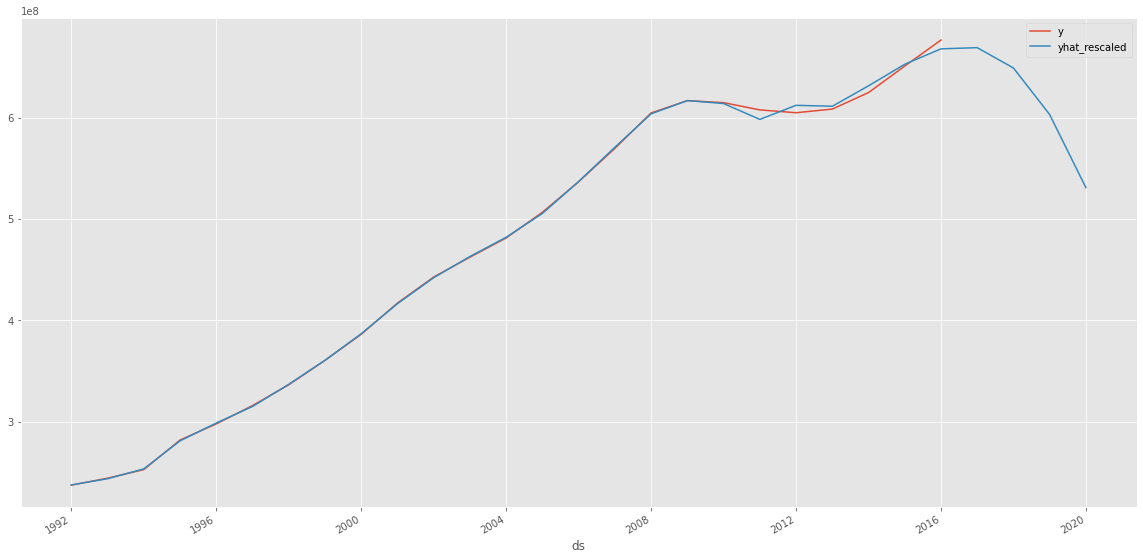

In [235]:
viz_df[['y', 'yhat_rescaled']].plot()

In [238]:
df_copy.index = pd.to_datetime(df_copy.index) #make sure our index as a datetime object
connect_date = df_copy.index[-2] #select the 2nd to last date

In [239]:
mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [240]:
predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2016-01-01,1.908308,20.312999,20.326570,1.908308,1.908308,18.411253,18.411253,18.411253,18.411253,18.411253,18.411253,0.0,0.0,0.0,20.319562
2016-12-31,1.930078,20.306491,20.333136,1.917393,1.939526,18.391237,18.391237,18.391237,18.391237,18.391237,18.391237,0.0,0.0,0.0,20.321315
2017-12-31,1.951847,20.239164,20.331535,1.901607,1.989654,18.339067,18.339067,18.339067,18.339067,18.339067,18.339067,0.0,0.0,0.0,20.290913
2018-12-31,1.973616,20.116975,20.310647,1.871644,2.063513,18.243864,18.243864,18.243864,18.243864,18.243864,18.243864,0.0,0.0,0.0,20.217480
2019-12-31,1.995385,19.928552,20.243302,1.831766,2.149018,18.094836,18.094836,18.094836,18.094836,18.094836,18.094836,0.0,0.0,0.0,20.090221


Now, let's build a dataframe to use in our new visualization. We'll follow the same steps we did before.

In [241]:
viz_df = df_copy.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df['yhat_scaled']=np.exp(viz_df['yhat'])

In [242]:
viz_df.head()

,y,yhat,yhat_lower,yhat_upper,yhat_scaled
ds,,,,,
1992-01-01,237333143.0,NaN,NaN,NaN,NaN
1993-01-01,244202408.0,NaN,NaN,NaN,NaN
1994-01-01,252664869.0,NaN,NaN,NaN,NaN
1995-01-01,281831835.0,NaN,NaN,NaN,NaN
1996-01-01,297740499.0,NaN,NaN,NaN,NaN


In [243]:
viz_df.tail()

,y,yhat,yhat_lower,yhat_upper,yhat_scaled
ds,,,,,
2016-01-01,676526434.0,20.319562,20.312999,20.326570,6.678417e+08
2016-12-31,NaN,20.321315,20.306491,20.333136,6.690134e+08
2017-12-31,NaN,20.290913,20.239164,20.331535,6.489806e+08
2018-12-31,NaN,20.217480,20.116975,20.310647,6.030312e+08
2019-12-31,NaN,20.090221,19.928552,20.243302,5.309726e+08


Now, let's plot everything to get the 'final' visualization

Text(0.5, 0, 'Year')

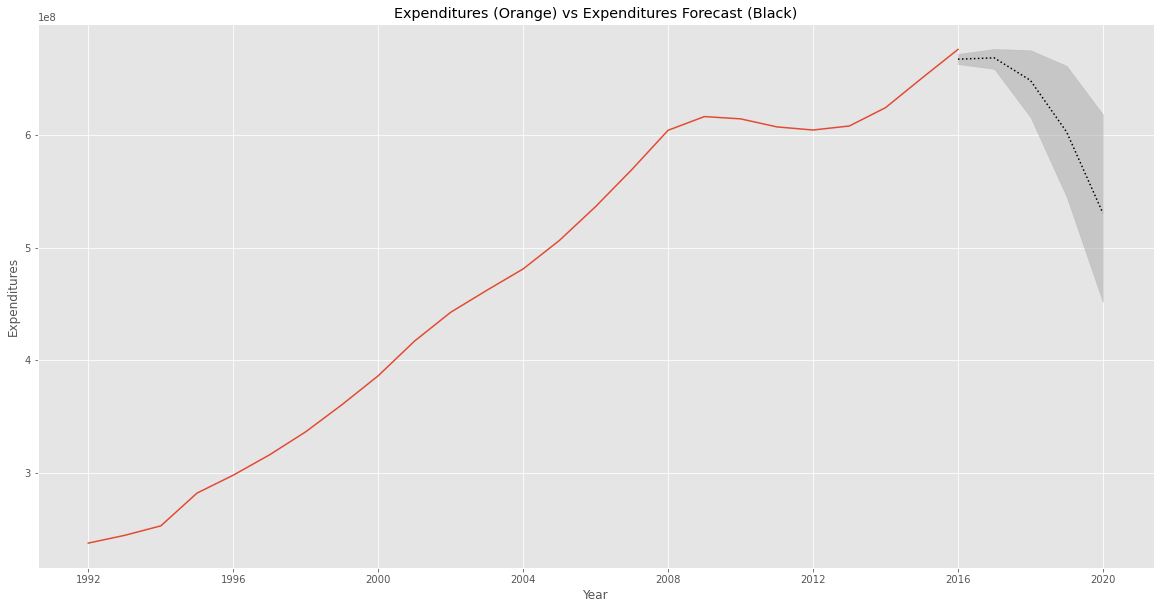

In [246]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.y)
ax1.plot(viz_df.yhat_scaled, color='black', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Expenditures (Orange) vs Expenditures Forecast (Black)')
ax1.set_ylabel('Expenditures')
ax1.set_xlabel('Year')
